Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
from sklearn.model_selection import train_test_split

Upload data

In [3]:
ATM_data = pd.read_csv("ATM_sample.csv")
# YOUR CODE HERE that produces test_error among everything else 
# print(test_error)
ATM_data

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
0,1018,10,1,0,0,0,72.750556
1,974,10,1,1,0,0,66.720482
2,96,2,0,0,0,1,19.189516
3,958,9,1,1,0,1,67.388669
4,103,4,0,1,0,1,15.813127
...,...,...,...,...,...,...,...
21995,1015,12,1,0,0,0,71.384290
21996,101,2,0,1,0,0,16.031066
21997,96,3,0,1,0,0,14.968847
21998,991,6,1,0,0,0,73.705665


In [4]:
# pip install missingno

In [5]:
len(ATM_data)

22000

In [6]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", 
      ATM_data.isnull().sum()) 

 
Count total NaN at each column in a DataFrame : 

 Shops       0
ATMs        0
Downtown    0
Weekday     0
Center      0
High        0
Withdraw    0
dtype: int64


In [7]:
ATM_data.describe()

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
count,22000.000000,22000.000000,22000.00000,22000.000000,22000.000000,22000.000000,22000.000000
mean,731.637318,7.937455,0.70200,0.714091,0.102455,0.301591,54.652818
std,411.869245,3.673415,0.45739,0.451857,0.303252,0.458959,25.099767
min,80.000000,0.000000,0.00000,0.000000,0.000000,0.000000,11.668197
25%,105.000000,4.000000,0.00000,0.000000,0.000000,0.000000,18.500386
50%,989.000000,9.000000,1.00000,1.000000,0.000000,0.000000,68.240749
75%,1007.000000,11.000000,1.00000,1.000000,0.000000,1.000000,71.345778
max,1083.000000,17.000000,1.00000,1.000000,1.000000,1.000000,103.964065



| Variable | Description |
| --- | --- |
|Withdraw | The total cash withdrawn a day (in 1,000th of local currency units)|
|  |
|Shops | Number of shops/restaurants within a walkable distance|
|  |  |
|ATMs | Number of other ATMs within a walkable distance |
| |  |
|Downtown =1 | if the ATM is in downtown, 0 if not|
|  |  |
|Workday = 1 | if the day is workday, 0 if holiday|
|  | |
|Center =1 | if the ATM is located in a center (shopping, airport, etc.), 0 if not|
|  |  |
|High =1 | if the ATM had a high cash demand in the last month, 0 if not|
|  | |

In [8]:
ATM_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Shops     22000 non-null  int64  
 1   ATMs      22000 non-null  int64  
 2   Downtown  22000 non-null  int64  
 3   Weekday   22000 non-null  int64  
 4   Center    22000 non-null  int64  
 5   High      22000 non-null  int64  
 6   Withdraw  22000 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 1.2 MB


In [9]:
correlations = ATM_data.corr()
correlations['Withdraw']


Shops       0.985797
ATMs        0.824030
Downtown    0.983574
Weekday    -0.050470
Center      0.088103
High        0.021275
Withdraw    1.000000
Name: Withdraw, dtype: float64

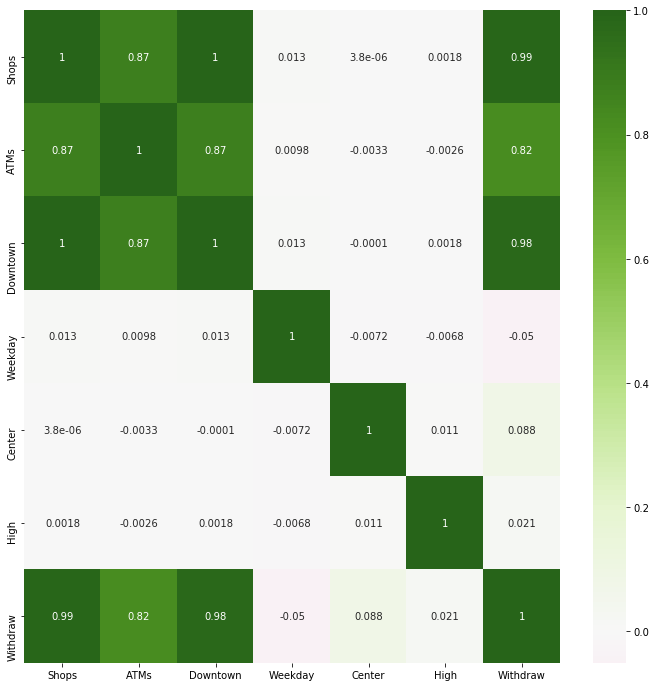

In [10]:
plt.figure(figsize=(12, 12)) 
sns.heatmap(ATM_data.corr(),  cmap='PiYG', center=0, annot=True)

In [11]:
drop_dat = ATM_data.drop(columns=['Downtown'])

In [12]:
drop_dat = ATM_data.drop(columns=['Shops'])

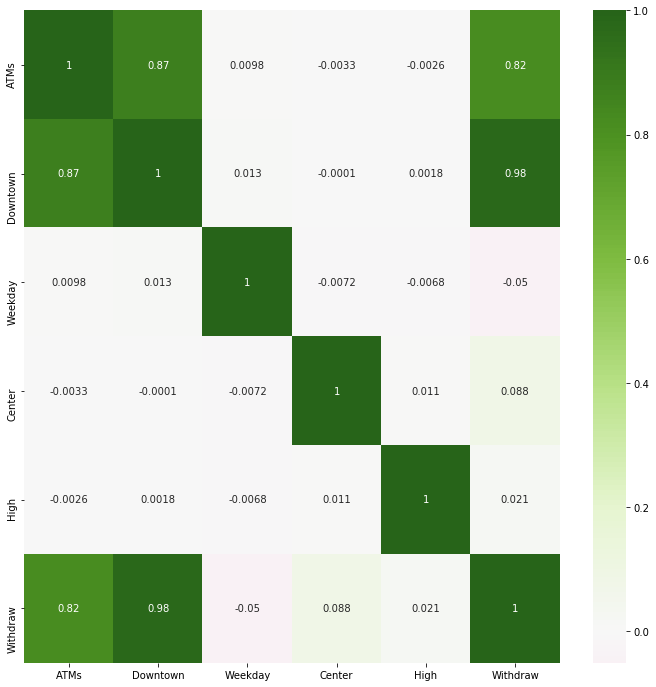

In [13]:
plt.figure(figsize=(12, 12)) 
sns.heatmap(drop_dat.corr(),  cmap='PiYG', center=0, annot=True)

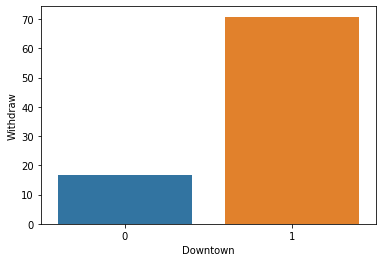

In [8]:
sns.barplot(x = "Downtown", y = "Withdraw", data = ATM_data)


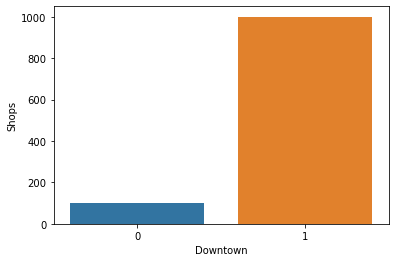

In [7]:
sns.barplot(x = "Downtown", y = "Shops", data = ATM_data)

In [ ]:
sns.barplot(x = "Withdraw", y = "Withdraw", data = ATM_data)


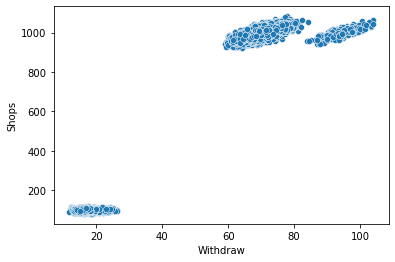

In [22]:
sns.scatterplot(x = "Withdraw", y = "Shops", data = ATM_data)

In [21]:
by_week = ATM_data.groupby(ATM_data['Weekday'])['Withdraw'].mean()
by_week

Weekday
0    56.654779
1    53.851269
Name: Withdraw, dtype: float64

c:\Users\emmag\miniconda3\envs\stats\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


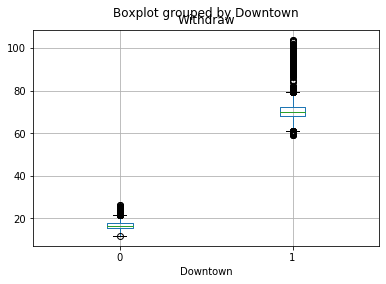

In [9]:
ATM_data.boxplot(by = 'Downtown', column = ['Withdraw'])

c:\Users\emmag\miniconda3\envs\stats\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


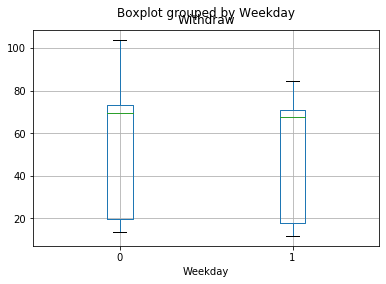

In [11]:
ATM_data.boxplot(by = 'Weekday', column = ['Withdraw'])

c:\Users\emmag\miniconda3\envs\stats\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


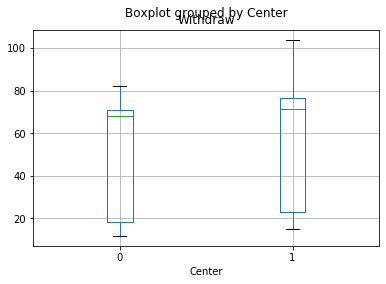

In [12]:
ATM_data.boxplot(by = 'Center', column = ['Withdraw'])

c:\Users\emmag\miniconda3\envs\stats\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


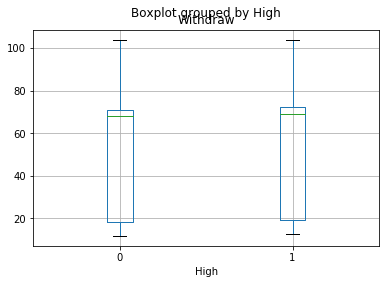

In [13]:
ATM_data.boxplot(by = 'High', column = ['Withdraw'])

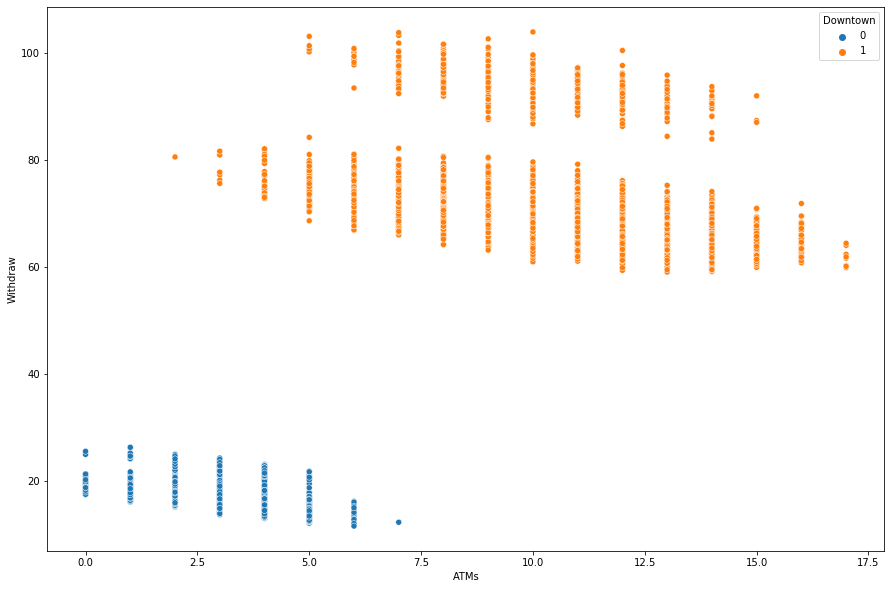

In [44]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x = 'ATMs', y = 'Withdraw', data=ATM_data, hue = 'Downtown')

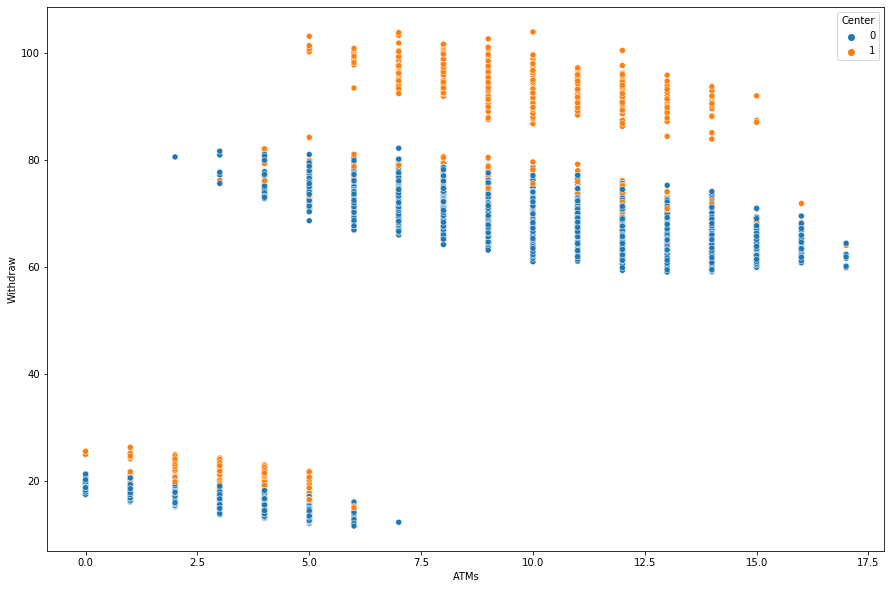

In [45]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x = 'ATMs', y = 'Withdraw', data=ATM_data, hue = 'Center')

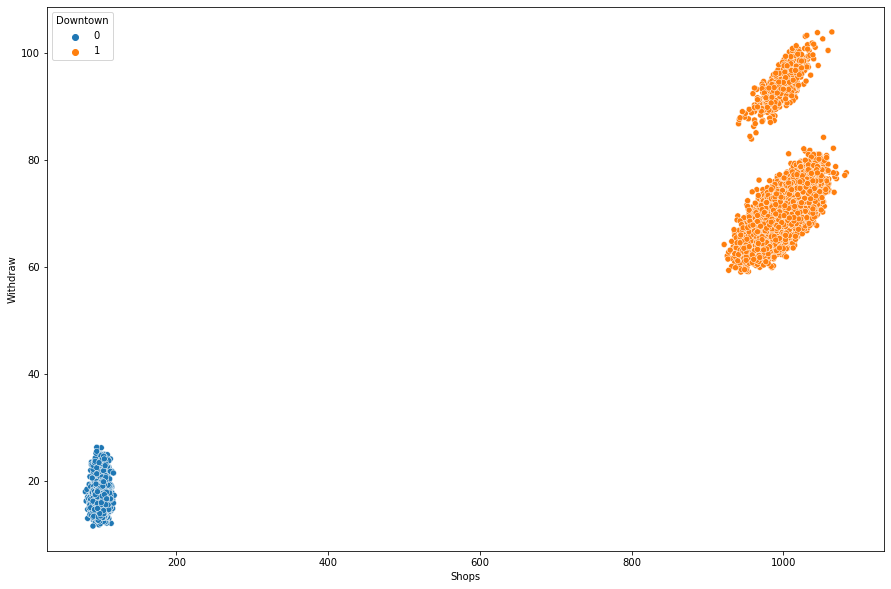

In [36]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x = 'Shops', y = 'Withdraw', data=ATM_data, hue = 'Downtown')

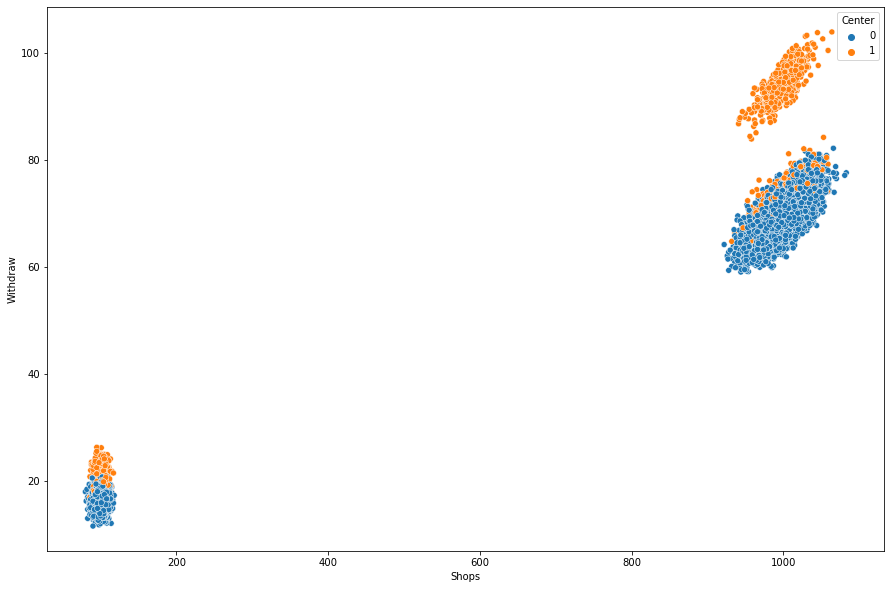

In [40]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x = 'Shops', y = 'Withdraw', data=ATM_data, hue = 'Center')

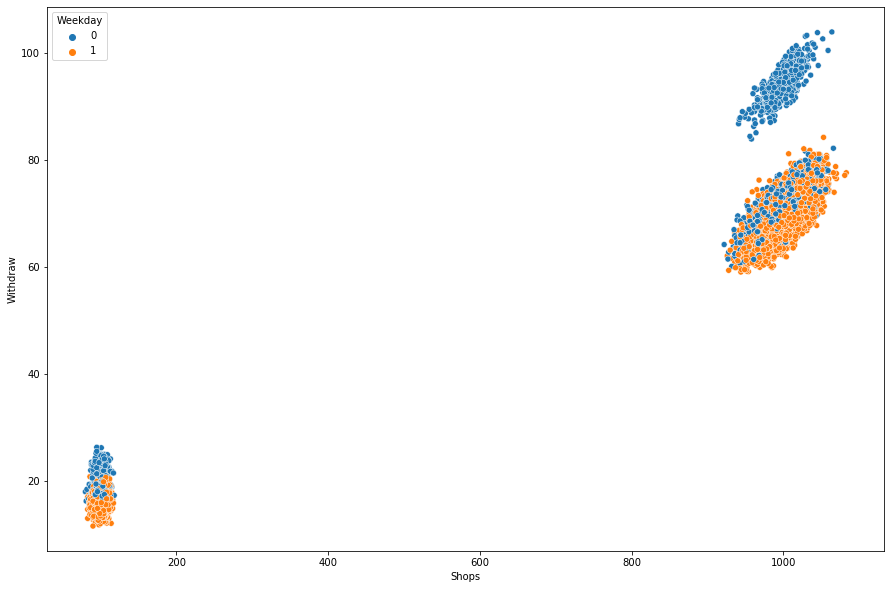

In [42]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x = 'Shops', y = 'Withdraw', data=ATM_data, hue = 'Weekday')

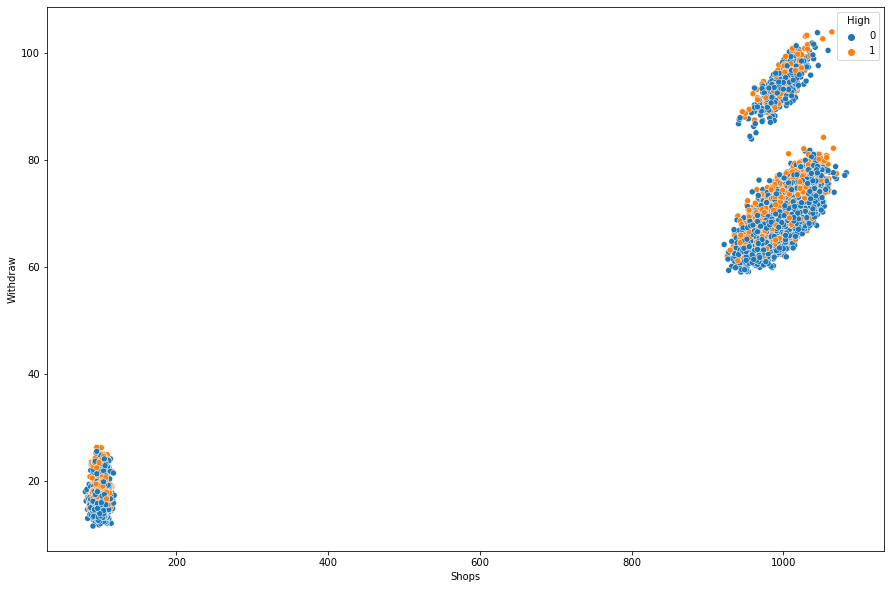

In [41]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x = 'Shops', y = 'Withdraw', data=ATM_data, hue = 'High')

Possible collinearity - note prior to any cleaning
- Downtown
- ATM
- Shops

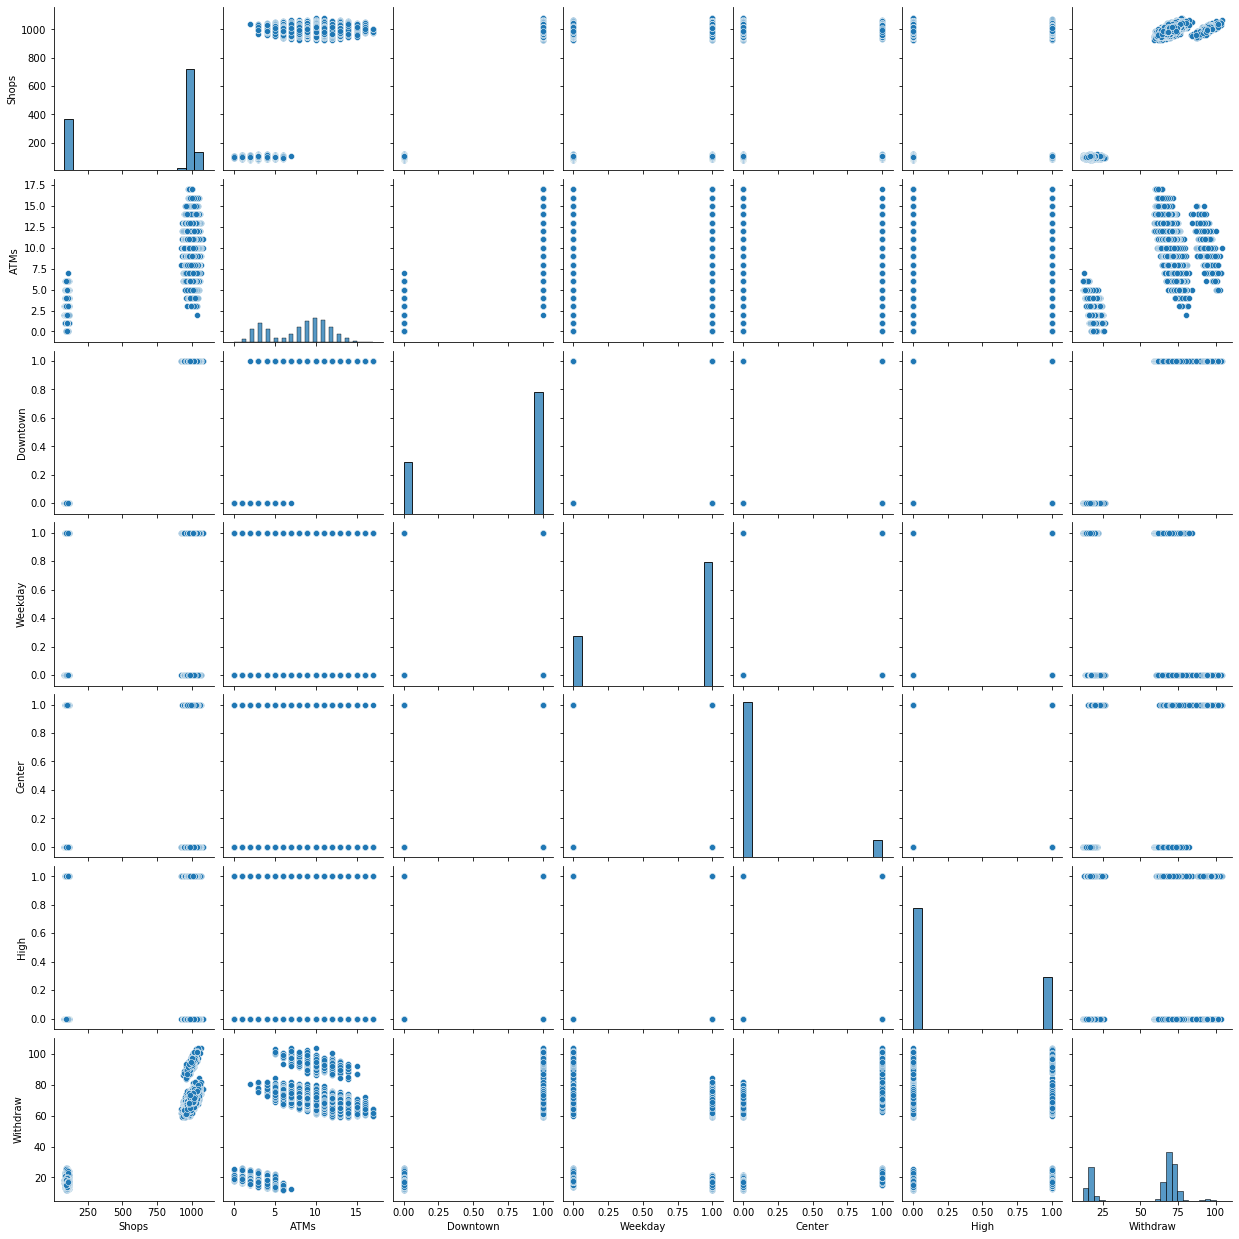

In [12]:
sns.pairplot(ATM_data)
plt.show()

- prioritise using feature selection ** Limited number of features currently (NN)
- look at interaction of withdraw & shops
- look at interaction of downtown and shops
- look at interaction of ATMS and Shops

In [4]:
X = ATM_data.drop(columns=['Withdraw'])
y = ATM_data['Withdraw']
X_encoded = pd.get_dummies(X)
X_encoded_dropped = X_encoded.dropna()
y_dropped = y.loc[X_encoded_dropped.index]

X_train, X_test, y_train, y_test = train_test_split(X_encoded_dropped, y_dropped, test_size=0.2, random_state=42)

In [5]:
X_train

,Shops,ATMs,Downtown,Weekday,Center,High
5207,979,13,1,1,0,0
4450,105,2,0,1,0,0
7033,103,3,0,1,0,0
487,1001,11,1,1,0,0
19537,987,11,1,1,0,0
...,...,...,...,...,...,...
11964,1004,8,1,0,0,0
21575,1017,13,1,1,0,0
5390,1019,7,1,1,0,1
860,998,8,1,0,0,0


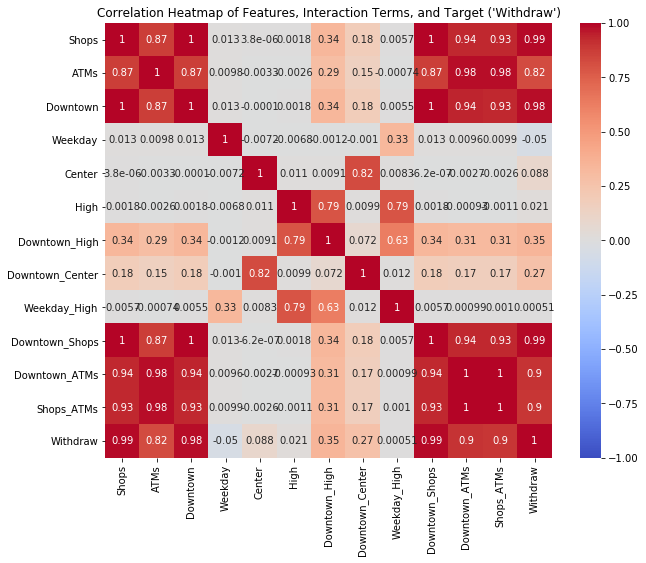

Withdraw           1.000000
Shops              0.985797
Downtown_Shops     0.985661
Downtown           0.983574
Downtown_ATMs      0.898650
Shops_ATMs         0.896272
ATMs               0.824030
Downtown_High      0.347885
Downtown_Center    0.266530
Center             0.088103
High               0.021275
Weekday_High       0.000506
Weekday           -0.050470
Name: Withdraw, dtype: float64

In [20]:
ATM_data['Downtown_High'] = ATM_data['Downtown'] * ATM_data['High']
ATM_data['Downtown_Center'] = ATM_data['Downtown'] * ATM_data['Center']
ATM_data['Weekday_High'] = ATM_data['Weekday'] * ATM_data['High']
ATM_data['Downtown_Shops'] = ATM_data['Downtown'] * ATM_data['Shops']
ATM_data['Downtown_ATMs'] = ATM_data['Downtown'] * ATM_data['ATMs']
ATM_data['Shops_ATMs'] = ATM_data['Shops'] * ATM_data['ATMs']

plt.figure(figsize=(10, 8))
sns.heatmap(ATM_data[['Shops', 'ATMs', 'Downtown', 'Weekday', 'Center', 'High', 
                      'Downtown_High', 'Downtown_Center', 'Weekday_High', 
                      'Downtown_Shops', 'Downtown_ATMs', 'Shops_ATMs', 'Withdraw']].corr(), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Features, Interaction Terms, and Target ('Withdraw')")
plt.show()

correlations = ATM_data.corr()['Withdraw'].sort_values(ascending=False)
correlations
